In [1]:
from pathlib import Path
import sys
project_root = str(Path(sys.path[0]).parents[0].absolute())
project_root
if project_root not in sys.path:
    sys.path.append(project_root)

from importlib import reload
    
from services.strategies import strategies

import pandas_datareader as pdr
import numpy as np
import pandas as pd
from pandas import IndexSlice as idx
import datetime as dt
import time
import matplotlib.pyplot as plt
from pathlib import Path
data_path = Path('.') / 'data'
import requests

In [54]:
reload(strategies)

<module 'services.strategies.strategies' from '/home/pmasse/pyfi/services/strategies/strategies.py'>

In [55]:
price_history = pd.DataFrame({
    'BTCEUR': {
        pd.to_datetime('2020-01-01'): 100.,
        pd.to_datetime('2020-01-02'):  90.,
        pd.to_datetime('2020-01-03'): 110.,
        pd.to_datetime('2020-01-04'): 120.,
        pd.to_datetime('2020-01-05'):  70.,            
    }
})
price_history

,BTCEUR
2020-01-01,100.0
2020-01-02,90.0
2020-01-03,110.0
2020-01-04,120.0
2020-01-05,70.0


In [56]:

portfolio = strategies.VirtualPortfolio(initial_volumes={'EUR': 1000}, datetimes=price_history.index)
portfolio.assets
portfolio.add_asset('BTC', 100)
portfolio.assets

,EUR,BTC
2020-01-01,1000.0,100.0
2020-01-02,1000.0,100.0
2020-01-03,1000.0,100.0
2020-01-04,1000.0,100.0
2020-01-05,1000.0,100.0


In [57]:
portfolio.assets.loc[pd.to_datetime('2020-01-03'), 'BTC'] = 75
portfolio.assets

,EUR,BTC
2020-01-01,1000.0,100.0
2020-01-02,1000.0,100.0
2020-01-03,1000.0,75.0
2020-01-04,1000.0,100.0
2020-01-05,1000.0,100.0


In [58]:
print(portfolio.get_asset_current_volume('BTC'))
print(portfolio.get_asset_current_volume('BTC', datetime=pd.to_datetime('2020-01-03')))

100.0
75.0


In [59]:
portfolio = strategies.VirtualPortfolio(initial_volumes={'EUR': 1000}, datetimes=price_history.index)
portfolio.assets

,EUR
2020-01-01,1000.0
2020-01-02,1000.0
2020-01-03,1000.0
2020-01-04,1000.0
2020-01-05,1000.0


In [60]:
portfolio.update_asset_volume(asset_code='EUR', datetime=pd.to_datetime('2020-01-03'), increment=True, volume=-10)
portfolio.assets

,EUR
2020-01-01,1000.0
2020-01-02,1000.0
2020-01-03,990.0
2020-01-04,990.0
2020-01-05,990.0


In [61]:
portfolio.update_asset_volume(asset_code='BTC', datetime=pd.to_datetime('2020-01-02'), increment=True, volume=10)
portfolio.assets

,EUR,BTC
2020-01-01,1000.0,0.0
2020-01-02,1000.0,10.0
2020-01-03,990.0,10.0
2020-01-04,990.0,10.0
2020-01-05,990.0,10.0


In [66]:
portfolio.pretty_trade(
    base_asset_code='BTC',
    quote_asset_code='EUR',
    price=30000.,
)
portfolio.assets

Trading: buy BTC EUR at price 30000.0 for volume None


,EUR,BTC
2020-01-01,1000.0,0.000000
2020-01-02,1000.0,10.000000
2020-01-03,990.0,10.000000
2020-01-04,990.0,10.000000
2020-01-05,0.0,10.200217


In [71]:
portfolio.pretty_trade(
    base_asset_code='BTC',
    quote_asset_code='EUR',
    price=30500.,
    trade_type='sell',
    volume=1.,
    allow_short_sale=True,
)
portfolio.assets

Trading: sell BTC EUR at price 30500.0 for volume 1.0


,EUR,BTC
2020-01-01,1000.000000,0.0
2020-01-02,1000.000000,10.0
2020-01-03,990.000000,10.0
2020-01-04,990.000000,10.0
2020-01-05,402606.608333,-3.0


In [6]:
strat = strategies.CrossAverageStrategy(trading_pair='BTCEUR')

In [7]:
strat.generate_signals(3)

In [8]:
portfolio = strategies.VirtualPortfolio(initial_volumes=[['EUR', 1000]])

In [9]:
strat.evaluate(
    price_history=pd.DataFrame({
        'BTCEUR': {
            pd.to_datetime('2020-01-01'): 100.,
            pd.to_datetime('2020-01-02'):  90.,
            pd.to_datetime('2020-01-03'): 110.,
            pd.to_datetime('2020-01-04'): 120.,
            pd.to_datetime('2020-01-05'):  70.,            
        }
    }),
    initial_portfolio=portfolio,
#     initial_free_value=100.,
)

Trading: buy BTC EUR at price 100.0 for volume None
Computed volume is 10.0
Trading: sell BTC EUR at price 120.0 for volume None
Computed volume is 10.0
Trading: buy BTC EUR at price 70.0 for volume None
Computed volume is 17.142857142857142
Evaluation of porfolio is: 1200.0
Percent return is: 20.00%
Annualized return is: 1679920291.85%


  asset_code     volume
0        EUR   0.000000
0        BTC  17.142857

In [10]:
strat.evaluate(
    price_history=pd.DataFrame({
        'BTCEUR': {
            pd.to_datetime('2020-01-01'): 100.,
            pd.to_datetime('2020-01-02'):  90.,
            pd.to_datetime('2020-01-03'): 110.,
            pd.to_datetime('2020-01-04'): 120.,
            pd.to_datetime('2020-01-05'):  70.,            
        }
    }),
    initial_portfolio=portfolio,
#     initial_free_value=100.,
)

Trading: buy BTC EUR at price 100.0 for volume None
Computed volume is 0.0
Trading: sell BTC EUR at price 120.0 for volume None
Computed volume is 17.142857142857142
Trading: buy BTC EUR at price 70.0 for volume None
Computed volume is 29.387755102040813
Evaluation of porfolio is: 2057.142857142857
Percent return is: 20.00%
Annualized return is: 1679920291.85%


  asset_code     volume
0        EUR   0.000000
0        BTC  29.387755

In [11]:
(pd.DataFrame({
        'BTCEUR': {
            pd.to_datetime('2020-01-01'): 100.,
            pd.to_datetime('2020-01-02'):  90.,
            pd.to_datetime('2020-01-03'): 110.,
            pd.to_datetime('2020-01-04'): 120.,
            pd.to_datetime('2020-01-05'):  70.,            
        }
    }).index.max()
-
pd.DataFrame({
        'BTCEUR': {
            pd.to_datetime('2020-01-01'): 100.,
            pd.to_datetime('2020-01-02'):  90.,
            pd.to_datetime('2020-01-03'): 110.,
            pd.to_datetime('2020-01-04'): 120.,
            pd.to_datetime('2020-01-05'):  70.,            
        }
    }).index.min()
)

Timedelta('4 days 00:00:00')

In [12]:
dt.timedelta(days=3) / dt.timedelta(hours=6)

12.0

In [13]:
def cross_strat(
    price_series,
    short_window,
    long_window,
    ax=None,
):
    short_mv = price_series.rolling(short_window).mean(center=False)
    long_mv = price_series.rolling(long_window).mean(center=False)
    buys =  (short_mv > long_mv) & ~(short_mv > long_mv).shift(1).iloc[1:]
    sells = ~(short_mv > long_mv) & (short_mv > long_mv).shift(1).iloc[1:]
    
    if not ax:
        fig, ax = plt.subplots(figsize=(20, 20))
    
    ax.plot(price_series)
    ax.plot(short_mv)
    ax.plot(long_mv)
    
    ax.scatter(buys[buys].index, price_series[buys[buys].index], marker="^", s=200, color='green')
    ax.scatter(sells[sells].index, price_series[sells[sells].index], marker="v", s=200, color='red')
    
    trades = pd.concat([price_series[sells[sells].index], price_series[buys[buys].index]], keys=['sell', 'buy'])
    rets = price_series[sells[sells].index].sum() - price_series[buys[buys].index].sum()
    print(rets)
    return(trades.swaplevel().sort_index())

84.78998947143555


Date            
2018-01-23  buy      44.259998
2018-01-25  sell     42.777500
2018-02-15  buy      43.247501
2018-03-20  sell     43.810001
2018-04-09  buy      42.512501
2018-04-23  sell     41.310001
2018-05-04  buy      45.957500
2018-06-18  sell     47.185001
2018-07-06  buy      46.992500
2018-09-13  sell     56.602501
2018-09-27  buy      56.237499
2018-10-10  sell     54.090000
2019-01-15  buy      38.267502
2019-05-09  sell     50.180000
2019-06-07  buy      47.537498
2019-08-05  sell     48.334999
2019-08-16  buy      51.625000
2019-08-29  sell     52.252499
2019-09-04  buy      52.297501
2019-09-26  sell     54.972500
2019-10-01  buy      56.147499
2019-12-04  sell     65.434998
2019-12-10  buy      67.120003
2020-02-05  sell     80.362503
2020-02-07  buy      80.007500
2020-02-24  sell     74.544998
2020-03-31  buy      63.572498
2020-07-24  sell     92.614998
2020-07-31  buy     106.260002
2020-09-09  sell    117.320000
2020-09-30  buy     115.809998
2020-10-22  sell    11

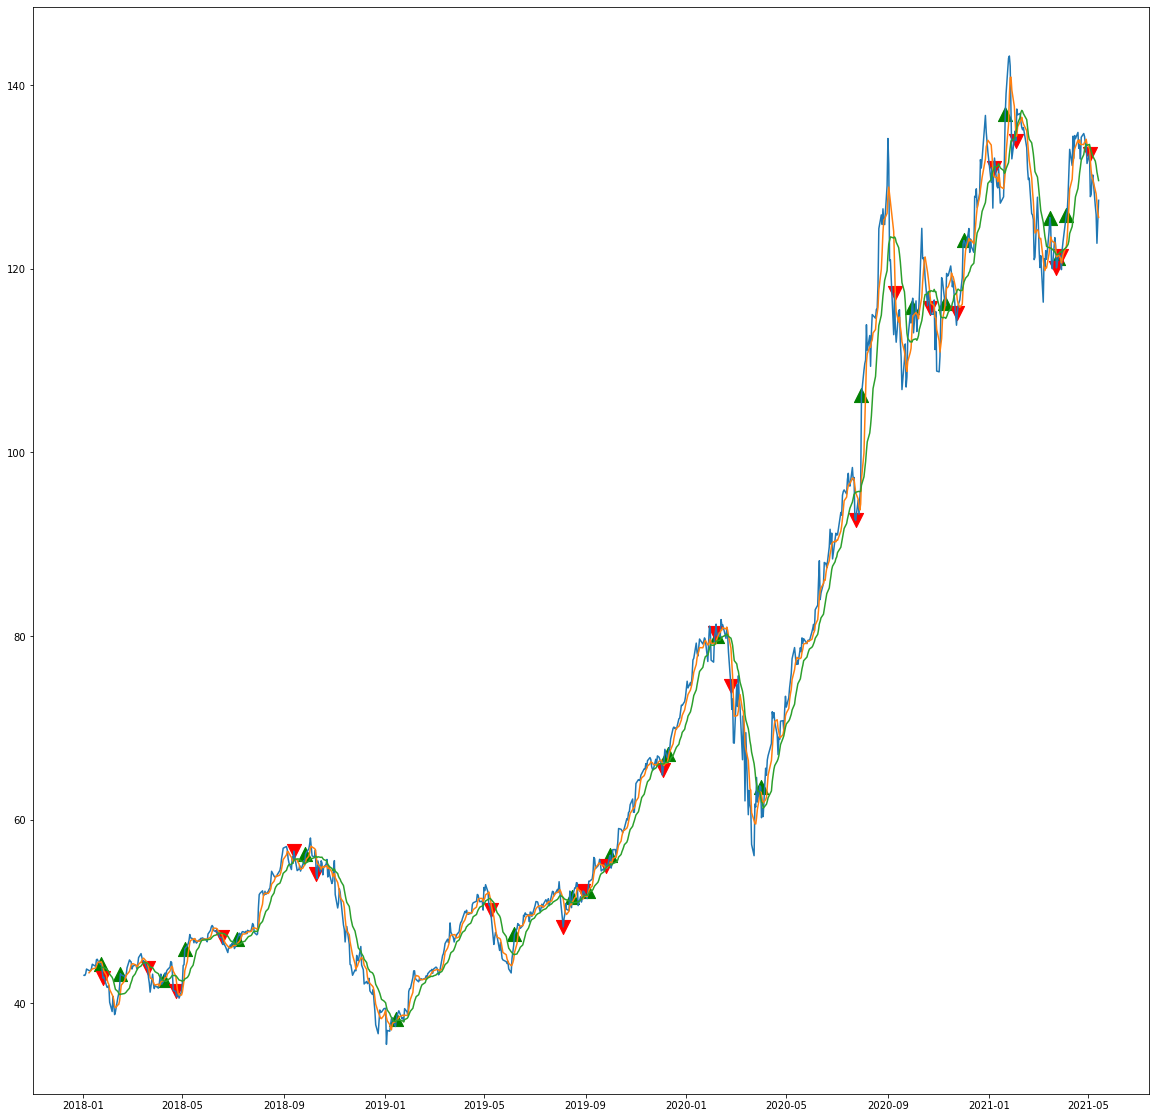

In [14]:
date_from = pd.to_datetime('2018-01-01')

cross_strat(
    pdr.get_data_yahoo(
        'AAPL',
        start=dt.datetime(2006, 1, 1),
        end=dt.datetime(2021, 5, 16),
    ).loc[idx[date_from:], 'Close'],
    5,
    15
)

Liste des assets et des paires tradables sur kraken :

In [15]:
asset_desc = pd.read_csv(
    Path('.') / 'krak_asset_desc.csv',
    sep=';',
).set_index('Code')
asset_desc

,Desc,Type,Statut
Code,,,
AAVE,Aave,Cryptocurrency,NaN
ADA,Cardano,Cryptocurrency,NaN
ALGO,Algorand,Cryptocurrency,NaN
ANKR,Ankr,Cryptocurrency,NaN
ANT,Aragon,Cryptocurrency,NaN
...,...,...,...
ZGBP,Great British Pound,Cash,NaN
ZJPY,Japanese Yen,Cash,NaN
ZKRW,South Korean Won,Cash,delisted


In [16]:
resp = requests.get('https://api.kraken.com/0/public/Assets')
resp.json()['result']

{'AAVE': {'aclass': 'currency',
  'altname': 'AAVE',
  'decimals': 10,
  'display_decimals': 5},
 'ADA': {'aclass': 'currency',
  'altname': 'ADA',
  'decimals': 8,
  'display_decimals': 6},
 'ADA.S': {'aclass': 'currency',
  'altname': 'ADA.S',
  'decimals': 8,
  'display_decimals': 6},
 'ALGO': {'aclass': 'currency',
  'altname': 'ALGO',
  'decimals': 8,
  'display_decimals': 5},
 'ANKR': {'aclass': 'currency',
  'altname': 'ANKR',
  'decimals': 10,
  'display_decimals': 5},
 'ANT': {'aclass': 'currency',
  'altname': 'ANT',
  'decimals': 10,
  'display_decimals': 5},
 'ATOM': {'aclass': 'currency',
  'altname': 'ATOM',
  'decimals': 8,
  'display_decimals': 6},
 'ATOM.S': {'aclass': 'currency',
  'altname': 'ATOM.S',
  'decimals': 8,
  'display_decimals': 6},
 'BAL': {'aclass': 'currency',
  'altname': 'BAL',
  'decimals': 10,
  'display_decimals': 5},
 'BAT': {'aclass': 'currency',
  'altname': 'BAT',
  'decimals': 10,
  'display_decimals': 5},
 'BCH': {'aclass': 'currency',
  'alt

In [17]:
resp = requests.get('https://api.kraken.com/0/public/AssetPairs')
for pair, desc in resp.json()['result'].items():
    try:
        print(
            pair,
            desc['altname'],
            desc['base'],
            asset_desc.loc[desc['base'], 'Desc'],
            desc['quote'],
            asset_desc.loc[desc['quote'], 'Desc'])
    except KeyError:
        print(pair)

AAVEAUD AAVEAUD AAVE Aave ZAUD Australian Dollar
AAVEETH AAVEETH AAVE Aave XETH Ethereum
AAVEEUR AAVEEUR AAVE Aave ZEUR Euro
AAVEGBP AAVEGBP AAVE Aave ZGBP Great British Pound
AAVEUSD AAVEUSD AAVE Aave ZUSD US Dollar
AAVEXBT AAVEXBT AAVE Aave XXBT Bitcoin
ADAAUD ADAAUD ADA Cardano ZAUD Australian Dollar
ADAETH ADAETH ADA Cardano XETH Ethereum
ADAEUR ADAEUR ADA Cardano ZEUR Euro
ADAGBP ADAGBP ADA Cardano ZGBP Great British Pound
ADAUSD ADAUSD ADA Cardano ZUSD US Dollar
ADAUSDT ADAUSDT ADA Cardano USDT Tether
ADAXBT ADAXBT ADA Cardano XXBT Bitcoin
ALGOETH ALGOETH ALGO Algorand XETH Ethereum
ALGOEUR ALGOEUR ALGO Algorand ZEUR Euro
ALGOGBP ALGOGBP ALGO Algorand ZGBP Great British Pound
ALGOUSD ALGOUSD ALGO Algorand ZUSD US Dollar
ALGOXBT ALGOXBT ALGO Algorand XXBT Bitcoin
ANKREUR ANKREUR ANKR Ankr ZEUR Euro
ANKRGBP ANKRGBP ANKR Ankr ZGBP Great British Pound
ANKRUSD ANKRUSD ANKR Ankr ZUSD US Dollar
ANKRXBT ANKRXBT ANKR Ankr XXBT Bitcoin
ANTETH ANTETH ANT Aragon XETH Ethereum
ANTEUR ANTEUR A

USDTAUD USDTAUD USDT Tether ZAUD Australian Dollar
USDTCAD USDTCAD USDT Tether ZCAD Canadian Dollar
USDTCHF
USDTEUR USDTEUR USDT Tether ZEUR Euro
USDTGBP USDTGBP USDT Tether ZGBP Great British Pound
USDTJPY USDTJPY USDT Tether ZJPY Japanese Yen
USDTZUSD USDTUSD USDT Tether ZUSD US Dollar
WAVESETH
WAVESEUR
WAVESUSD
WAVESXBT
XBTAUD XBTAUD XXBT Bitcoin ZAUD Australian Dollar
XBTCHF
XBTDAI XBTDAI XXBT Bitcoin DAI Dai
XBTUSDC XBTUSDC XXBT Bitcoin USDC USD Coin
XBTUSDT XBTUSDT XXBT Bitcoin USDT Tether
XDGEUR XDGEUR XXDG Dogecoin ZEUR Euro
XDGUSD XDGUSD XXDG Dogecoin ZUSD US Dollar
XDGUSDT XDGUSDT XXDG Dogecoin USDT Tether
XETCXETH ETCETH XETC Ethereum Classic XETH Ethereum
XETCXXBT ETCXBT XETC Ethereum Classic XXBT Bitcoin
XETCZEUR ETCEUR XETC Ethereum Classic ZEUR Euro
XETCZUSD ETCUSD XETC Ethereum Classic ZUSD US Dollar
XETHXXBT ETHXBT XETH Ethereum XXBT Bitcoin
XETHXXBT.d ETHXBT.d XETH Ethereum XXBT Bitcoin
XETHZCAD ETHCAD XETH Ethereum ZCAD Canadian Dollar
XETHZCAD.d ETHCAD.d XETH Ethere

Récupération des cours du jour : 

In [18]:
def get_ohlc(pair):
    resp = requests.get(f'https://api.kraken.com/0/public/OHLC?pair={pair}')
    data = (
        pd.json_normalize(
            resp.json(),
            record_path=['result', pair],
        ).rename(
            {
                0: 'timestamp',
                1: 'open',
                2: 'high',
                3: 'low',
                4: 'close',
                5: 'vwap',
                6: 'volume',
                7: 'count',
            },
            axis=1,
        ).astype(
            'float'
        ).assign(
            datetime=lambda x: x.timestamp.apply(lambda y: dt.datetime.fromtimestamp(y))
        ).set_index('datetime')
    )
    return(data)

<AxesSubplot:xlabel='datetime'>

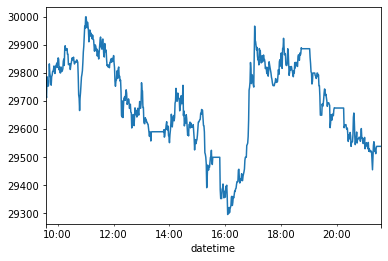

In [19]:
get_ohlc('XXBTZEUR')['close'].plot()

Construction de l'ohlc à partir des historiques de trades :

In [20]:
def get_ohlc_from_hist(
    pair,
    step='1D',
    start=None,
    end=None,
):
    trades = pd.read_csv(
        data_path / f'{pair}.csv',
        names=['timestamp', 'price', 'volume'],
    )
    trades['datetime'] = (
        trades['timestamp']
        .apply(lambda x: dt.datetime.fromtimestamp(x))
    )
    if start:
        trades = trades.loc[trades['datetime'] >= start]
    if end:
        trades = trades.loc[trades['datetime'] <= end]
    trades = trades.sort_values('datetime')
    ohlv = (
        trades
        .resample(step, on='datetime')
        ['price']
        .agg(['first', 'max', 'min', 'last'])
        .ffill()
        .rename(
            {
                'first': 'open',
                'max': 'high',
                'min': 'low',
                'last': 'close',
            },
            axis=1
        )
    )        
    
    return(ohlv)

get_ohlc_from_hist('XXBTZEUR', '1M', None, None)

FileNotFoundError: [Errno 2] No such file or directory: 'data/XXBTZEUR.csv'

In [ ]:
get_ohlc_from_hist('XBTEUR', '1min', pd.to_datetime('01-01-2020'), pd.to_datetime('2020-01-02'))['close']

In [ ]:
%%time
prices = get_ohlc_from_hist('XBTEUR', '1min', pd.to_datetime('01-01-2020'), pd.to_datetime('2020-01-02'))['close']

In [ ]:
prices.rolling(500).std().plot()

In [ ]:
%%time
cross_strat(
    prices,
    50,
    100,
)

In [ ]:
def nonce_unix_microseconds():
    now = dt.datetime.now().timestamp() 
    return(int(now * 1e6))

In [ ]:
nonce_unix_microseconds()

In [ ]:
import urllib.parse
import hashlib
import hmac
import base64

def get_kraken_signature(urlpath, data, secret):

    postdata = urllib.parse.urlencode(data)
    encoded = (str(data['nonce']) + postdata).encode()
    message = urlpath.encode() + hashlib.sha256(encoded).digest()

    mac = hmac.new(base64.b64decode(secret), message, hashlib.sha512)
    sigdigest = base64.b64encode(mac.digest())
    return sigdigest.decode()

api_sec = "kQH5HW/8p1uGOVjbgWA7FunAmGO8lsSUXNsu3eow76sz84Q18fWxnyRzBHCd3pd5nE9qa99HAZtuZuj6F1huXg=="

data = {
    "nonce": "1616492376594", 
    "ordertype": "limit", 
    "pair": "XBTUSD",
    "price": 37500, 
    "type": "buy",
    "volume": 1.25
}

signature = get_kraken_signature("/0/private/AddOrder", data, api_sec)
print("API-Sign: {}".format(signature))